Name : Aravind Haridas

In [ ]:
import keras
import pickle
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read dataset: chef_data.pickle

The inputs are 22-element binary vectors. Each element represents one of the 22 chefs, with a 1 indicating that the chef participated in a given project and a 0 meaning that they did not. The outputs are 4-element vectors.

In [ ]:
with open('/content/drive/MyDrive/chef_data.pickle', 'rb') as f:
    (x_train, y_train), (x_test, y_test) = pickle.load(f)

# Scaling outputs to be larger than 0 and less than 1
(Not exactly 0 or 1, because we want to use the sigmoid function that can only approach but never reach these values)

In [ ]:
y_train_norm = (y_train - [-1, -1, 0, -100000]) / [12, 12, 2000, 300000]
y_test_norm = (y_test - [-1, -1, 0, -100000]) / [12, 12, 2000, 300000]

Question1(10 points):
write code to get the input dimensions from x_train

In [ ]:
num_inputs = x_train.shape[1]
input_shape = (num_inputs,)
batch_size = 100
num_outputs = 4
epochs = 100
#write your code here
# num_inputs =
num_inputs = x_train.shape[1]
input_shape = (num_inputs,)
######
input_shape = (num_inputs,)



Question(50 points):
Add neural network layers to match the model architecture.

Architecture:

hidden_layer1 (Dense) (None, 20)

hidden_layer2 (Dense) (None, 20)

hidden_layer3 (Dense) (None, 20)


output (Dense) (None, 4)

In [ ]:
model = Sequential()
model.add(Dense(20, input_shape=input_shape, activation='relu', name='input'))
#write your code here
model = Sequential()
model.add(Dense(20, input_shape=input_shape, activation='relu', name='input'))

# Add hidden_layer1
model.add(Dense(20, activation='relu', name='hidden_layer1'))

# Add hidden_layer2
model.add(Dense(20, activation='relu', name='hidden_layer2'))

# Add hidden_layer3
model.add(Dense(20, activation='relu', name='hidden_layer3'))

# Add the output layer
model.add(Dense(num_outputs, activation='sigmoid', name='output'))

# Compile the model (you need to specify a loss function and optimizer)
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model's architecture
model.summary()

############


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 20)                420       
                                                                 
 hidden_layer1 (Dense)       (None, 20)                420       
                                                                 
 hidden_layer2 (Dense)       (None, 20)                420       
                                                                 
 hidden_layer3 (Dense)       (None, 20)                420       
                                                                 
 output (Dense)              (None, 4)                 84        
                                                                 
Total params: 1764 (6.89 KB)
Trainable params: 1764 (6.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Question 3(40 points):

Design model.compile and model.fit calls to train the model.

1) model.compile should use mse(mean square error) as loss, adam() as optimizer with learning rate =0.05, and metrics as accuracy.

2)model.fit should use epochs=100 and batch_size=100

In [ ]:
#write your code here
from keras.optimizers import Adam

# Compile the model
learning_rate = 0.05
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# Train the model
epochs = 100
batch_size = 100

history = model.fit(x_train, y_train_norm, epochs=epochs, batch_size=batch_size)

# Display the model summary
model.summary()


Epoch 1/100
40/40 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.4852
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.5888
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.6070
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.6210
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.6323
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.6528
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.6712
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.6917
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.6885
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.7015
Epoch 11/

32/32 [==============================] - 0s 1ms/step
[1.04217791e+00 1.00997223e+00 2.18955626e+02 2.31312899e+04]


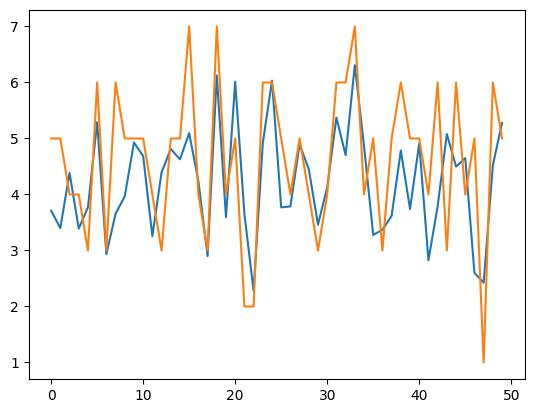

In [ ]:
# Get the rescaled predictions for the test set and compute their deviation from the desired ones
y_predict_norm = model.predict(x_test)


y_predict = y_predict_norm * [12, 12, 3000, 300000] - [1, 1, 0, 100000]
y_diff = y_predict - y_test
y_stdev = np.std(y_diff, axis=0)

print(y_stdev)

plt.plot(y_predict[:50,1])
plt.plot(y_test[:50,1])

plt.show()
